# Visualizations and Word Clouds <a id="top"></a>

## Table of Contents

1. [Introduction](#intro)
    1. Last Week
        1. Data Science
        2. Python
            1. Data Types
            2. Methods
            3. Packages
    2. Visualization
        1. Common Graphs
        2. Packages
2. [Getting Started](#start)
3. [Choosing Colors](#color)
4. [Adding Labels](#labels)
5. [Summary](#sum)

### Introduction <a id="intro"></a>
Welcome to week 2! Last week we covered a lot. We started with an overview of data science, both from a career and work flow perspective and tehn continued on to cover the basic datatypes of python. Today, we are going to continue where we left off and take a further look into creating some stunning visuals!

#### Last Week

##### The Typical Data Science Workflow <a id="ds_workflow"></a>
![](./images/data_science_lifecycle.png)
##### Python Data Types
![](./images/dataStruct.png)
##### Packages
We also saw how to load packages into python in order to use additional functions and methods stored within them.   
Recall:

#### Visualization

##### Common Graphs
![](./images/Data_Viz_Catalog.png)

##### Packages
* plotly
* matplotlib
* pandas (Primarily a spreadsheet [excel-like] package, but has some built in visualizations using matplotlib)
* folium
* seaborn (Makes everything prettier!)

In [2]:
import pandas
travel_df = pandas.read_excel('./cities.xlsx')
cities = travel_df.to_dict('records')
cities[0]

{'City': 'Solta', 'Country': 'Croatia', 'Population': 1700, 'Area': 59}

### Getting Started <a id="start"></a>

Let's pull in some data!

### Importing Modules
Technically we already did this (we imported the pandas package up above) but let's do it once again just as a reminder.  
This time we'll also **alias** the pandas package as **pd** while it may not seem like a lot saving those 4 letters typing will add up if we're using it frequently.

In [3]:
import pandas as pd

#### Modules https://docs.python.org/2/tutorial/modules.html
Here's the official blurbs about Methods and Importing from python:

"If you quit from the Python interpreter and enter it again, the definitions you have made (functions and variables) are lost. Therefore, if you want to write a somewhat longer program, you are better off using a text editor to prepare the input for the interpreter and running it with that file as input instead. This is known as creating a script. As your program gets longer, you may want to split it into several files for easier maintenance. You may also want to use a handy function that you’ve written in several programs without copying its definition into each program.

To support this, Python has a way to put definitions in a file and use them in a script or in an interactive instance of the interpreter. Such a file is called a module; definitions from a module can be imported into other modules or into the main module (the collection of variables that you have access to in a script executed at the top level and in calculator mode)."


#### Packages (collections of Modules)  https://docs.python.org/3/reference/import.html
"It’s important to keep in mind that all packages are modules, but not all modules are packages. Or put another way, packages are just a special kind of module. Specifically, any module that contains a __path__ attribute is considered a package."  

#### Importing https://docs.python.org/3/reference/import.html
"Python code in one module gains access to the code in another module by the process of importing it. The import statement is the most common way of invoking the import machinery, but it is not the only way. Functions such as importlib.import_module() and built-in __import__() can also be used to invoke the import machinery."

In [5]:
df = pd.read_excel('cities.xlsx')
df.head() #Preview the first 5 rows of the dataframe

,City,Country,Population,Area
0,Solta,Croatia,1700,59
1,Greenville,USA,84554,68
2,Buenos Aires,Argentina,13591863,4758
3,Los Cabos,Mexico,287651,3750
4,Walla Walla Valley,USA,32237,33


#### Common Pandas methods
* df.head() #Preview the first 5 rows of the dataframe
* df.head(10) #Preview the first 10 rows
* df.tail() #Preview the last 5 rows
* df.columns #Returns a list of the column names Notice that this is an attribute not a method/function; there are no parentheses
* df.info() #Return column names, length of dataframe and storage size info
* df[col] #Return a particular column of the dataframe where col is the name of the column
* df[col].value_counts() #Returns a frequency count of entries within the column in descending order
* df[col].unique() #Returns a list of unique entries within the column
* df[col].nunique() #Returns the number of unique entries within the column as an integer
* df[[cols]] #Returns the dataframe with only those columns indicated


In [13]:
%matplotlib inline

## Making a Bar Chart
Let's make a bar chart of cities and their population.

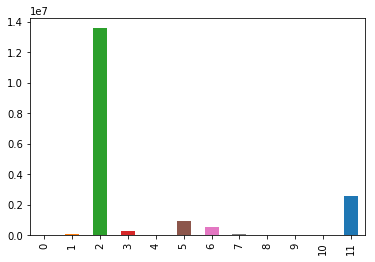

In [17]:
df['Population'].plot(kind='bar')

Hmmm, it would sure be nice to have the actual names of the cities on our graph!
To do this, we have to tell Pandas what feature we want to use as the **index** for the dataframe.
The index is shown on the left edge and can be thought of as the row names.

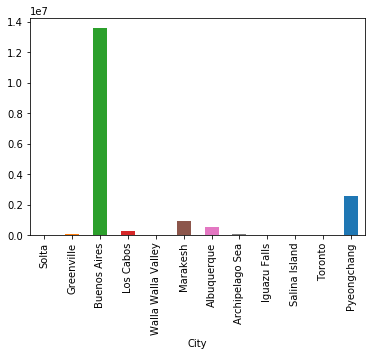

In [18]:
df.set_index('City')['Population'].plot(kind='bar')

Better. Let's also change this to a horizontal bar chart so that the cities are easier to read.

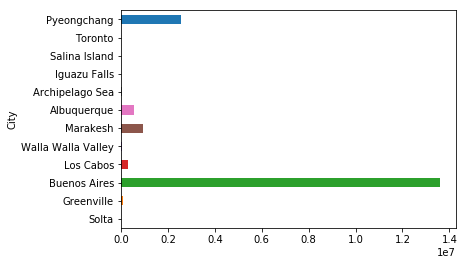

In [19]:
df.set_index('City')['Population'].plot(kind='barh') #Notice barh instead of bar

Great! I want to make my chart all orange though!

### Choosing Colors <a id="color"></a>
Here's a few helpful resources for getting started:  
http://colorbrewer2.org/#type=sequential&scheme=YlOrRd&n=3  
https://matplotlib.org/api/colors_api.html  

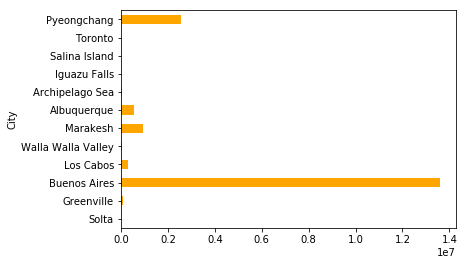

In [27]:
df.set_index('City')['Population'].plot(kind='barh', color='Orange')

We can do way better then that though!  
Checkout what you can do with the **seaborn** package and their color palettes!

In [28]:
import seaborn as sns

In [31]:
sns.set_style("darkgrid") #Load in some snazzier visual settings to spice things upb

See https://seaborn.pydata.org/tutorial/aesthetics.html for all too many options

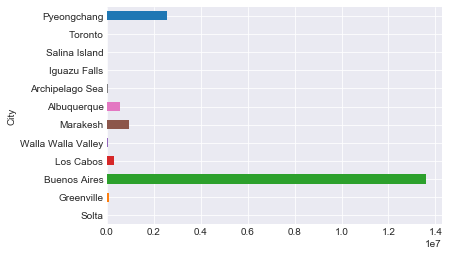

In [33]:
df.set_index('City')['Population'].plot(kind='barh') #Same code, prettier graph thanks to Seaborn!

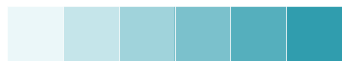

In [34]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl")) #Previewing a color scheme

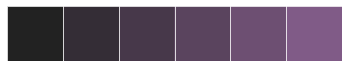

In [35]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd")) #Another color scheme!

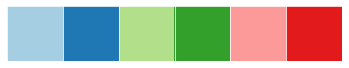

In [36]:
sns.palplot(sns.color_palette("Paired")) #And another

Those purples were amazing! Let's incorporate them into our graph.

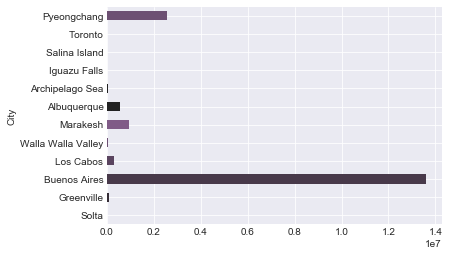

In [39]:
dark_purples = sns.dark_palette("muted purple", input="xkcd")
df.set_index('City')['Population'].plot(kind='barh', color = dark_purples)

### Adding Labels <a id="labels"></a>

We need another module for this one. 

In [40]:
import matplotlib.pyplot as plt

Text(0.5,0,'Population in Tens of Millions')

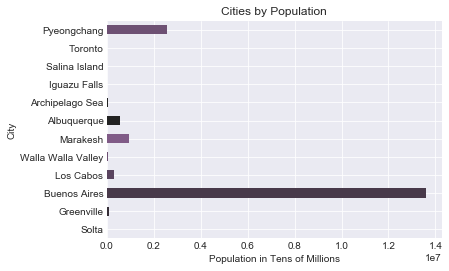

In [52]:
#Same Initial Code
dark_purples = sns.dark_palette("muted purple", input="xkcd")
df.set_index('City')['Population'].plot(kind='barh', color = dark_purples)

#Now Add a title
plt.title('Cities by Population')

#Label the X-Axis
plt.xlabel('Population in Tens of Millions')

#### Once more for good measure...
This time lets make everything bigger!

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text yticklabel objects>)

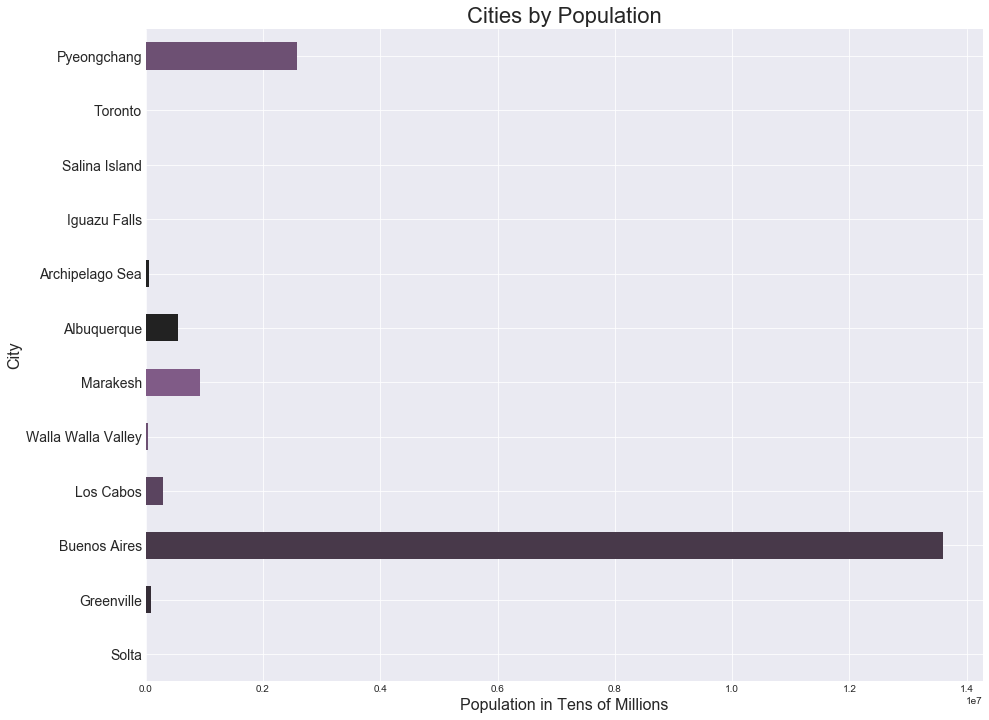

In [57]:
#Same Initial Code
dark_purples = sns.dark_palette("muted purple", input="xkcd") 
df.set_index('City')['Population'].plot(kind='barh', color = dark_purples, figsize=(15,12)) #Bigger graph

#Now Add a title
plt.title('Cities by Population', fontsize=22)

#Label the X-Axis
plt.xlabel('Population in Tens of Millions', fontsize=16)

#Enlarge the Y-Axis Label
plt.ylabel('City', fontsize=16)

#Enlarge the City Names themselves
plt.yticks(fontsize=14)

### Summary <a id="sum"></a>
So there you have it! Quick and easy visuals and how to import data from .xlsx or .csv files. Bon voyage!

Remember:

In [7]:
#Import to Module
import pandas as pd

In [10]:
#Load a spreadsheet as a DataFrame using Pandas
df = pd.read_excel(filename)  
#or  
df = pd.read_csv(filename)

In [11]:
# Make sure that graphs show up in Jupyter Notebook:  
%matplotlib inline 

df[[x_col, y_col]].plot(kind='barh') #Create a bar chart!

### [Back to Top](#top)